![Banner](img/banner.png)

# **Actividad No.2:** Dualidad en programación lineal

***Matemáticas para Machine Learning***.

**Semana 8 - Lección 2:** Dualidad.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad 2 de la semana 8 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 2: Dualidad. En este se utilizará el conocimiento adquirido sobre dualidad en programación lineal para generar conclusiones sobre los parámetros del problema primal.

**Objetivos de Aprendizaje:**

*   Formular el problema dual de un problema de optimización con restricciones de igualdad y de desigualdad.
*   Interpretar solución primal y dual en un problema de optimización convexo en el que hay dualidad fuerte. 

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

Se tiene el siguiente problema de programación en forma estándar.

$$ \begin{array}{rl}
\min_{x} & c^{T}x \\
\text{s.a} & Ax = b\\
 & x \geq 0
\end{array} $$

Ahora, idetifiquese el problema **dual** asociado. Para ello se plantea el lagrangiano del problema anterior.
$$\mathcal{L(x,\lambda,u)}=c^{T}x+\lambda^{T}(b-Ax) - u^{T}x$$
$$\mathcal{L(x,\lambda,u)}=(c-A^{T}\lambda-u)^{T}x+\lambda^{T}b$$

Luego, considere la función $q(\lambda,\mu)$, donde $q(\lambda,\mu)=\min_{x}\mathcal{L}(x,\lambda,\mu)$. Note que $q(\lambda,\mu)$ es cota inferior de $f(x)$, con $x$ un punto factible del problema primal

Para definir $q(\lambda,\mu)$ es necesario minimizar el lagrangiano respecto a $x$, por lo que se calcula la derivada parcial.
$$
\begin{array}{rl}
\frac{\partial \mathcal{L}(x,\lambda,u)}{\partial x}&=c-A^{T}\lambda-u = 0
\end{array}$$

El vector de multiplicadores de Lagrange $u$ es mayor o igual a cero, entonces $c-A^{T}\lambda\geq 0$, es decir, $A^{T}\lambda \geq c$. Es decir, región factible de $q(\lambda,\mu)$ son aquellos puntos tal que $c-A^{T}\lambda \geq 0$ y $u \geq 0$.

Como se menciono $q(\lambda,\mu)$ es cota inferior de $f(x)$, no obstante ¿es la mejor cota posible? No necesariamente, es por ello que se formula un problema auxiliar (dual) el cual busca maximizar la cota inferior para $f(x)$.

$$ \begin{array}{rl}
\max_{\lambda} & b^{T}\lambda \\
\text{s.a} & A^{T}\lambda \leq c
\end{array} $$


# Inicialización

In [2]:
# Básico
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Ejemplo

## Relación entre el problema primal y dual

Se plantea el siguiente problema de problemación lineal.

$$\textbf{Problema primal}$$

$$
\max \left[\begin{array}{c}
3 & 2
\end{array}\right]\left[\begin{array}{c}
x_{1} \\
x_{2}
\end{array}\right]\\
\left[
\begin{array}{cc}
1 & 2\\
2 & 1\\
2 & 3
\end{array}\right]
\left[\begin{array}{c}
x_{1} \\
x_{2}
\end{array}\right]
\leq
\left[\begin{array}{c}
600 \\
900 \\
1200
\end{array}
\right]\\
x_{1},x_{2}\geq 0$$

Luego, a través del procedimiento descrito se formula el problema dual.

$$\textbf{Problema dual}$$

$$
\min \left[\begin{array}{c}
600 & 900 & 1200
\end{array}\right]\left[\begin{array}{c}
\lambda_{1} \\
\lambda_{2} \\
\lambda_{3} 
\end{array}\right]\\
\left[
\begin{array}{cc}
1 & 2 & 2\\
2 & 1 & 3
\end{array}\right]
\left[\begin{array}{c}
\lambda_{1} \\
\lambda_{2} \\
\lambda_{3} 
\end{array}\right]
\geq
\left[\begin{array}{c}
3 \\
2
\end{array}
\right]\\
\lambda_{1}, \lambda_{2}, \lambda_{3}\geq 0$$

Después, se solucionaron los problemas, opteniendo los siguientes resultados: 

$$x_{1}=400, x_{2}=100$$

$$\lambda_{1}=1/3, \lambda_{2}=4/3, \lambda_{3}=0$$

A continuación se calcula el valor de la función objetivo para cada problema.

$$\begin{align*}
f_P &= 3(400)+2(100)\\
f_P &= 1400\\
 &\\
f_D &= 600(1/3)+900(4/3)+1200(0)\\
f_D &= 1400
\end{align*}$$

El valor de la función objetivo es $1400$ para ambos problemas, lo cual se debe a que el problema es acotado y existe un óptimo.

## Interpretación ecónomica

**Contexto del ejercicio**

La compañia de tecnología PAPPEL tiene dos productos insignia, el celular de gama alta MyPhone y la tablet preferida por diseñadores gráficos MinePad. El precio de venta de los productos es: 2 y 3 millones de pesos, respectivamente. Para producir un MyPhone se necesita un gramo de aluminio y dos gramos de silicio, mientras que para producir un MinePad se necesita un gramo de aluminio y un gramo de silicio. PAPPEL tiene en stock tres gramos de aluminio y cuatro de silicio. ¿Cuantós celulares y cuantás tablets debe producir PAPPEL para maximizar sus ingresos?

**Formulación**

El escenario descrito se modela como un problema de optimización lineal, de la siguiente forma.

$$
\max 2 x_{1} + 3x_{2}\\
\begin{array}{cl}
x_{1} + x_{2} & \leq  3\\
2x_{1} + x_{2}& \leq  4
\end{array}\\
x_{1},x_{2}\geq 0$$

donde $x_{1}$ es la cantidad de celuladores MyPhone producidos y $x_{2}$ la cantidad de MinePad producidas. Cuya solución es: $x_{1}=0$, $x_{2}=3$.

**Problema Dual**

El problema dual es el siguiente

$$
\min 3 \lambda_{1} + 4\lambda_{2}\\
\begin{array}{cl}
\lambda_{1} + 2\lambda_{2} & \geq  2\\
\lambda_{1} + \lambda_{2}& \geq  3
\end{array}\\
\lambda_{1}, \lambda_{2}\geq 0$$

Cuya solución es: $\lambda_{1}=3$, $\lambda_{2}=0$.

**Dualidad y optimalidad**

Se soluciona el problema descrito y se obtiene que PAPPEL debe producir $0$ MyPhone y $3$ MinePad. En la posterior reunión de los directivos de la compañia se comparte dicho resultado, no obstante el prónostico para los ingresos no es de su agrado, por lo que proponen comprar más material y así producir más unidades para la venta ¿qué material deberían comprar? y ¿a qué precio?

A partir del *Teorema de Dualidad de Programación Lineal* se conoce que si el problema primar tiene una solución óptima, entonces el problema dual tambien tiene la tiene y se cumple que $c^{T}x=b^{T}\lambda$.

En el contexto actual el vector $b$ contiene el stock en bodega de los recursos que se utilizan en la producción, de modo que aumentar la cantidad de material afecta dicha estructura. Si el vector aumenta $\theta$, es decir, se compra $\theta_{1}$ gramos de aluminio y $\theta_{2}$ gramos de oro el nuevo valor para la función objetivo es: 
$$f^{1}=(b+\theta)^{T}\lambda$$

Sin comprar más recursos la función objetivo es $b^{T}\lambda$, entonces el aumento en la función objetivo es:
$$\begin{align*}
f^{1}-f^{0}&=(b+\theta)^{T}\lambda-b^{T}\lambda\\
f^{1}-f^{0}&=\theta^{T}\lambda
\end{align*}$$

De modo que el cambio marginal del i-ésimo recurso (fila $i$ de $b$) es igual a la i-ésima variable dual ($\lambda_{i}$). Es decir, aumentar la cantidad de aluminio en $1$ gramo mantiene constante los ingresos, pero aumentar la cantidad de silicio en $1$ gramo aumenta en $3$ millones los ingresos.

Para corroborar la afirmación anterior considere la región factible del problema primal.
<img src="img/feaseble_region_max_point_1.png" width="500"/>
Ahora, analice el cambio en la región factible según el aumento de un recurso u otro.

### Aumentar cantidad de silicio
Considere que la cantidad de silicio aumenta un gramo, como resultado la región factible es la siguiente.
<img src="img/feaseble_region_max_point_2.png" width="500"/>
Notese que la solución óptima es la misma que aquella del problema sin aumentar la cantidad en stock de silicio. Es decir, el cambio en la función objetivo ante un cambio marginal en la cantidad de silicio es cero, igual que la variable dual asociada $\lambda_{2}$.

### Aumentar cantidad de aluminio
Considere que la cantidad de aluminio aumenta un gramo, como resultado la región factible es la siguiente.
<img src="img/feaseble_region_max_point_3.png" width="500"/>
Notese que la solución óptima es diferente de aquella del problema sin aumentar la cantidad en stock de aluminio, ahora la función objetivo es $12$. El cambio en la función objetivo ante un cambio marginal en la cantidad de aluminio es de $3$ unidades, igual que la variable dual asociada $\lambda_{1}$.

### Conclusión

Como se menciono anteriormente la solución del problema primal es: $x_{1}=0$, $x_{2}=3$, ahora revisense las restricciones.

$$
f_{P}(x_{1}^{*},x_{2}^{*})=9\\
\begin{array}{cl}
x_{1}^{*} + x_{2}^{*} =3& \leq  3\\
2x_{1}^{*} + x_{2}^{*} =3& \leq  4
\end{array}$$

La restricción asociada al recurso aluminio se cumple con igualdad y la restricción asociada al silicio esta holgada. Aumentar la cantidad disponible de silicio no afecta la función objetivo, pues ya se utilizo el aluminio en su totalidad, lo cual explica que el aumento marginal de silicio no afecte los ingresos.

Para finalizar, se identifico que las variables duales representan el cambio en la función objetivo ante un cambio marginal en el "recurso" asociado a cada restricción. Además, con dicha consideración se determina que si PAPPLE desea comprar más aluminio, su costo debe ser menor a $3$ millones por gramo, pues en caso contrario no hay incentivos para combrar más recurso.

# Problema

La chocolatería ChocoAndes es un pequeño emprendimiento del departamento de Ingeniería Química y de Alimentos que fabrica y comercializa chocolates con cacao de distintas variedades. Actualmente producen dos tipos de chocolates: chocolate oscuro y chocolate blanco. Una unidad de cualquier tipo de chocolate pesa 60g. Una unidad de chocolate oscuro se vende a 7,000 COP y una unidad de chocolate blanco se vende a 6,000 COP. Los costos asociados a materia prima, mano de obra y demás costos operacionales equivalen a 3,500 COP por cada unidad de chocolate oscuro y 2,000 COP por cada unidad de chocolate blanco.

La producción de estos chocolates requiere de dos ingredientes en común: manteca de cacao y azúcar. Por cada unidad de chocolate oscuro se requiere 6g de manteca de cacao y 21 g de azúcar. Por cada unidad de chocolate blanco se requiere 22g de manteca de cacao y 18g de azúcar. Cada semana, la chocolatería ChocoAndes tiene disponible 12kg de manteca de cacao y 20kg de azúcar. La demanda de chocolate oscuro es ilimitada, pero a lo sumo le demandan 315 unidades de chocolate blanco por semana.

# Análisis

Para el análisis considere que la chocolatería ChocoAndes pueden vender cantidad fraccionarias de chocolate.

**1. Formule el problema y su respectivo problema dual asociado. Especifique variables de decisión y restricciones. Recuerde que la chocolatería ChocoAndes quiere maximizar su utilidad.**

**Respuesta:**

**Formulación del problema primal**

 **Paso 1:** Definir variables de decisión 
 
 $x_{1}$ = cantidad de unidades de chocolate oscuro a fabricar por semana.
 
 $x_{2}$ = cantidad de unidades de chocolate blanco a fabricar por semana. 
 
 **Paso 2:** Definir función objetivo: máximizar utilidades
 
$$
\max 3500 x_{1} + 4000 x_{2}\\
$$

**Paso 3:** Definir restricciones

Restricción de disponibilidad de manteca de cacao:
 $$
\begin{array}{cl}
6 x_{1} + 22 x_{2} & \leq  12000\\
\end{array}\\
$$

Restricción de disponibilidad de azúcar:
 $$
\begin{array}{cl}
21 x_{1} + 18 x_{2}& \leq  20000
\end{array}\\
$$

Restricción de demanda máxima de unidades de chocolate blanco:
 $$
\begin{array}{cl}
x_{2}& \leq  315
\end{array}\\
$$

Restricción de no-negatividad:
$$
x_{1}, x_{2}\geq 0
$$

**Formulación del problema dual**

 **Paso 1:** Definir variables de decisión 
 
 $\lambda_{1}$ = costo marginal de la manteca de cacao.
 
 $\lambda_{2}$ = costo marginal del azúcar. 
 
 $\lambda_{3}$ = costo marginal de demanda de unidades de chocolate blanco
 
 **Paso 2:** Definir función objetivo: minimizar costos marginales
 
$$
\max 12000 \lambda_{1} + 20000 \lambda_{2} + 315 \lambda_{3} 
$$

**Paso 3:** Definir restricciones

Restricción de utilidad de unidad de chocolate oscuro:
 $$
\begin{array}{cl}
6 \lambda_{1} + 21 \lambda_{2} & \geq  3500\\
\end{array}\\
$$

Restricción de utilidad de unidad de chocolate blanco:
 $$
\begin{array}{cl}
22 \lambda_{1} + 18 \lambda_{2} + \lambda{3} & \geq  4000
\end{array}\\
$$

Restricción de no-negatividad:
$$
\lambda_{1}, \lambda_{2}, \lambda_{3} \geq 0
$$

**2. Genere una grafica de la región factible del problema primal.**

**Respuesta:**

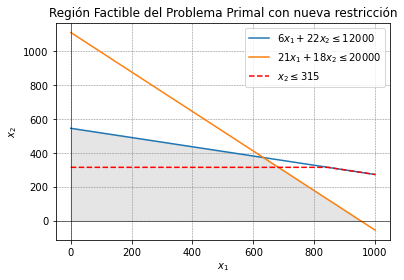

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las restricciones
x1 = np.linspace(0, 1000, 100)

# Restricción de manteca de cacao: 6x1 + 22x2 <= 12000
x2_manteca = (12000 - 6*x1) / 22

# Restricción de azúcar: 21x1 + 18x2 <= 20000
x2_azucar = (20000 - 21*x1) / 18

# Restricción de cantidad de chocolate blanco: x2 <= 315
x2_chocolate_blanco = np.minimum(315*np.ones_like(x1), (12000 - 6*x1) / 22)

# No-negatividad
x2_non_negative = np.zeros_like(x1)

# Graficar las restricciones
plt.plot(x1, x2_manteca, label=r'$6x_1 + 22x_2 \leq 12000$')
plt.plot(x1, x2_azucar, label=r'$21x_1 + 18x_2 \leq 20000$')
plt.plot(x1, x2_chocolate_blanco, label=r'$x_2 \leq 315$', linestyle='dashed', color='red')
plt.fill_between(x1, np.minimum(x2_manteca, x2_azucar), where=(x2_azucar >= 0) & (x2_manteca >= 0) & (x2_chocolate_blanco <= 315), interpolate=True, alpha=0.2, color='gray')

# Etiquetas y leyendas
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Región Factible del Problema Primal con nueva restricción')
plt.show()

**3. Reporte el valor óptimo para las variables de decisión del problema primal y del problema dual. Tambien incluya el valor de la función objetivo.**

**Respuesta:**

**Problema primal**

In [8]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo
c = [-3500, -4000]

# Coeficientes de las restricciones en el lado izquierdo
A = [
    [6, 22],
    [21, 18]
]

# Lado derecho de las restricciones
b = [12000, 20000]

# Límites inferiores y superiores de las variables
x0_bounds = (0, None)  # x1 >= 0
x1_bounds = (0, 315)   # x2 <= 315

# Resolver el problema de optimización lineal
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='simplex')

# Imprimir la solución óptima
print("Solución óptima:")
print("Cantidad de unidades de chocolate oscuro (x1):", result.x[0])
print("Cantidad de unidades de chocolate blanco (x2):", result.x[1])
print("Valor óptimo de la función objetivo:", -result.fun)  # Multiplicamos por -1 ya que linprog resuelve problemas de minimización

Solución óptima:
Cantidad de unidades de chocolate oscuro (x1): 682.3809523809524
Cantidad de unidades de chocolate blanco (x2): 315.0
Valor óptimo de la función objetivo: 3648333.3333333335


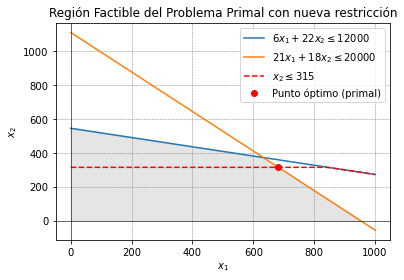

In [11]:
# Definir las restricciones
x1 = np.linspace(0, 1000, 100)

# Restricción de manteca de cacao: 6x1 + 22x2 <= 12000
x2_manteca = (12000 - 6*x1) / 22

# Restricción de azúcar: 21x1 + 18x2 <= 20000
x2_azucar = (20000 - 21*x1) / 18

# Restricción de cantidad de chocolate blanco: x2 <= 315
x2_chocolate_blanco = np.minimum(315*np.ones_like(x1), (12000 - 6*x1) / 22)

# No-negatividad
x2_non_negative = np.zeros_like(x1)

# Graficar las restricciones
plt.plot(x1, x2_manteca, label=r'$6x_1 + 22x_2 \leq 12000$')
plt.plot(x1, x2_azucar, label=r'$21x_1 + 18x_2 \leq 20000$')
plt.plot(x1, x2_chocolate_blanco, label=r'$x_2 \leq 315$', linestyle='dashed', color='red')
plt.fill_between(x1, np.minimum(x2_manteca, x2_azucar), where=(x2_azucar >= 0) & (x2_manteca >= 0) & (x2_chocolate_blanco <= 315), interpolate=True, alpha=0.2, color='gray')
plt.plot(result.x[0], result.x[1], 'ro', label='Punto óptimo (primal)')

# Etiquetas y leyendas
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Región Factible del Problema Primal con nueva restricción')
plt.show()

**Problema dual**

In [9]:
from scipy.optimize import linprog

# Coeficientes de la función objetivo dual
c_dual = [12000, 20000, 315]  # Añadimos el coeficiente correspondiente a lambda3

# Coeficientes de las restricciones en el lado izquierdo dual
A_dual = [
    [-6, -21, 0],
    [-22, -18, -1]
]

# Lado derecho de las restricciones duales
b_dual = [-3500, -4000]

# Límites inferiores y superiores de las variables duales
lambda1_bounds = (0, None)
lambda2_bounds = (0, None)
lambda3_bounds = (0, None)

# Resolver el problema dual de optimización lineal
result_dual = linprog(c_dual, A_ub=A_dual, b_ub=b_dual, bounds=[lambda1_bounds, lambda2_bounds, lambda3_bounds], method='simplex')

# Imprimir la solución óptima del problema dual
print("Solución óptima del problema dual:")
print("Precio sombra de la manteca de cacao (lambda1):", result_dual.x[0])
print("Precio sombra del azúcar (lambda2):", result_dual.x[1])
print("Precio sombra de la demanda máxima de chocolate blanco (lambda3):", result_dual.x[2])
print("Valor óptimo de la función objetivo dual:", result_dual.fun)

Solución óptima del problema dual:
Precio sombra de la manteca de cacao (lambda1): 0.0
Precio sombra del azúcar (lambda2): 166.66666666666666
Precio sombra de la demanda máxima de chocolate blanco (lambda3): 999.9999999999999
Valor óptimo de la función objetivo dual: 3648333.333333333


**4. En base al inciso anterior ¿cuál es el ingrediente más valioso para la chocolatería? Tenga en cuenta la interpretación económica del problema dual.** 

**Respuesta:**

El azúcar.

**5.Solucione en el problema primal variando el valor de la demanda de chocolate blanco de 310 a 380 ¿Cuál es el valor máximo a partir del cual la demanda de chocolate blanco afecta el valor de las variables de decisión?** 

**Respuesta:**

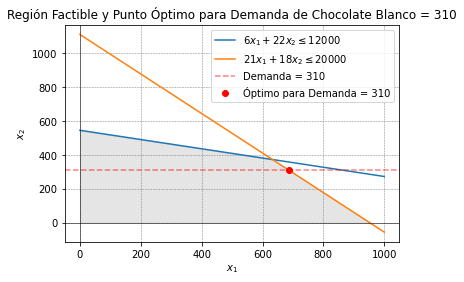

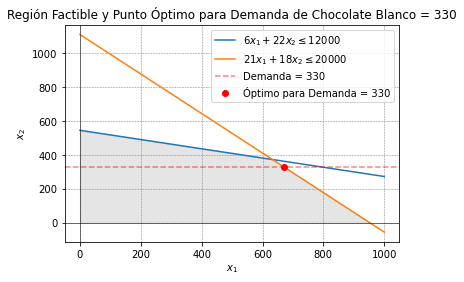

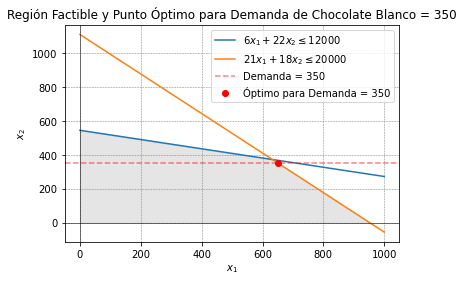

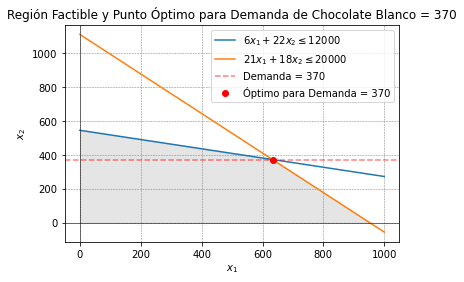

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog

# Función para resolver el problema primal con variación en la demanda de chocolate blanco
def solve_primal(demanda_chocolate_blanco):
    c_primal = [-3500, -4000]
    A_primal = [[6, 22], [21, 18]]
    b_primal = [12000, 20000]
    # Límites inferiores y superiores de las variables
    x0_bounds = (0, None)  # x1 >= 0
    x1_bounds = (0, demanda_chocolate_blanco)   # x2 <= 315
    result_primal = linprog(c_primal, A_ub=A_primal, b_ub=b_primal, bounds=[x0_bounds, x1_bounds], method='simplex')
    return result_primal

# Valores de la demanda de chocolate blanco en el rango de 310 a 380 en pasos de 20
demandas = np.arange(310, 381, 20)

# Crear gráficos individuales para cada valor de demanda
for demanda in demandas:
    # Resolver el problema primal
    resultado_primal = solve_primal(demanda)

    # Coordenadas de la región factible del primal
    x1 = np.linspace(0, 1000, 100)
    x2_manteca = (12000 - 6*x1) / 22
    x2_azucar = (20000 - 21*x1) / 18

    # Graficar la región factible del primal
    plt.figure()
    plt.plot(x1, x2_manteca, label=r'$6x_1 + 22x_2 \leq 12000$')
    plt.plot(x1, x2_azucar, label=r'$21x_1 + 18x_2 \leq 20000$')
    plt.fill_between(x1, np.minimum(x2_manteca, x2_azucar), where=(x2_azucar >= 0) & (x2_manteca >= 0) & (x2_chocolate_blanco <= 315), interpolate=True, alpha=0.2, color='gray')

    # Graficar la línea de la nueva demanda de chocolate blanco
    plt.axhline(demanda, linestyle='dashed', color='red', alpha=0.5, label=f'Demanda = {demanda}')

    # Punto óptimo del problema primal
    plt.plot(resultado_primal.x[0], resultado_primal.x[1], 'ro', label=f'Óptimo para Demanda = {demanda}')

    # Etiquetas y leyendas
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title(f'Región Factible y Punto Óptimo para Demanda de Chocolate Blanco = {demanda}')

# Mostrar todos los gráficos
plt.show()

print()